In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/hala/Downloads/train.csv")
dt= pd.read_csv("/home/hala/Downloads/test.csv")
sub=pd.read_csv('/home/hala/Downloads/gender_submission.csv')
original_train = df.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values


In [ ]:
dt=pd.merge(dt,sub)

In [3]:
#finding missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

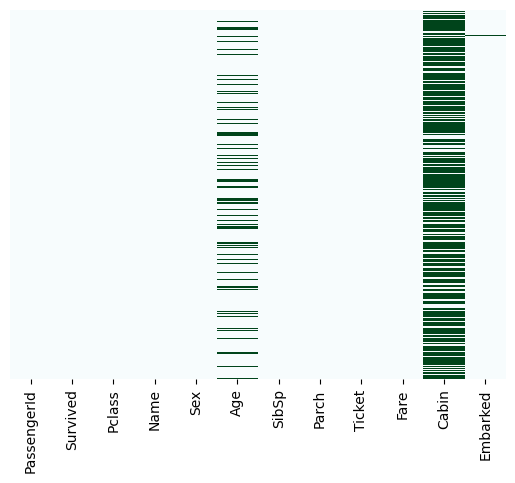

In [5]:
#Finding the amount of missing values for each column
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='BuGn')

In [6]:
#Handling Embarked feature by replace the missing values with the most common value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


dt['Fare'].fillna(dt['Fare'].mode()[0], inplace=True)

In [7]:
#Handling Cabin feature by making a new featur "Deck" taking the fist letter and replace the missing values with 'N'

df['Deck']=df["Cabin"]
df['Deck']=df["Deck"].str.slice(0,1)
df['Deck']=df["Deck"].fillna("N")

dt['Deck']=dt["Cabin"]
dt['Deck']=dt["Deck"].str.slice(0,1)
dt['Deck']=dt["Deck"].fillna("N")

In [8]:


df.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)

dt.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)


In [ ]:
#pd.get_dummies(df, columns=["Embarked"])

In [9]:
df.duplicated().sum()

0

In [ ]:

# df['age>10']=np.where(df["Age"]>=10, 0,1)
# dt['age>10']=np.where(dt["Age"]>=10, 0,1)

In [10]:
full_data=[df,dt]
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [11]:
##not for this session
#Third method of age

#Extract the titles of name to calculate the mean age of each title
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].unique()


##not for this session
#Third method of age

#Extract the titles of name to calculate the mean age of each title
dt['Title'] = dt['Name'].str.extract('([A-Za-z]+)\.', expand=True)
dt['Title'].unique()



array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [12]:
##not for this session
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
df['Title1'] = df['Title'].map(title_reduction)
df['Title1'].unique()



title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
dt['Title1'] = dt['Title'].map(title_reduction)
dt['Title1'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [13]:
##not for this session
#replacing NaN with the mean value of each title
for title, age in df.groupby('Title1')['Age'].mean().iteritems():
    print(title, age)
    df.loc[(df['Title1']==title) & (df['Age'].isnull()), 'Age'] = age

for title, age in dt.groupby('Title')['Age'].mean().iteritems():
    print(title, age)
    dt.loc[(dt['Title1']==title) & (dt['Age'].isnull()), 'Age'] = age
    

Dr 42.0
Master 4.574166666666667
Miss 21.86
Mr 32.74014778325123
Mrs 35.981818181818184
Rev 43.166666666666664
Col 50.0
Dona 39.0
Dr 53.0
Master 7.406470588235294
Miss 21.77484375
Mr 32.0
Mrs 38.903225806451616
Ms nan
Rev 35.5


In [14]:
df['Age']=df['Age'].astype(int)
dt['Age']=dt['Age'].astype(int)


In [15]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Group all non-common titles into one single grouping "Rare"

    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

     # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;


In [16]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
dt.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


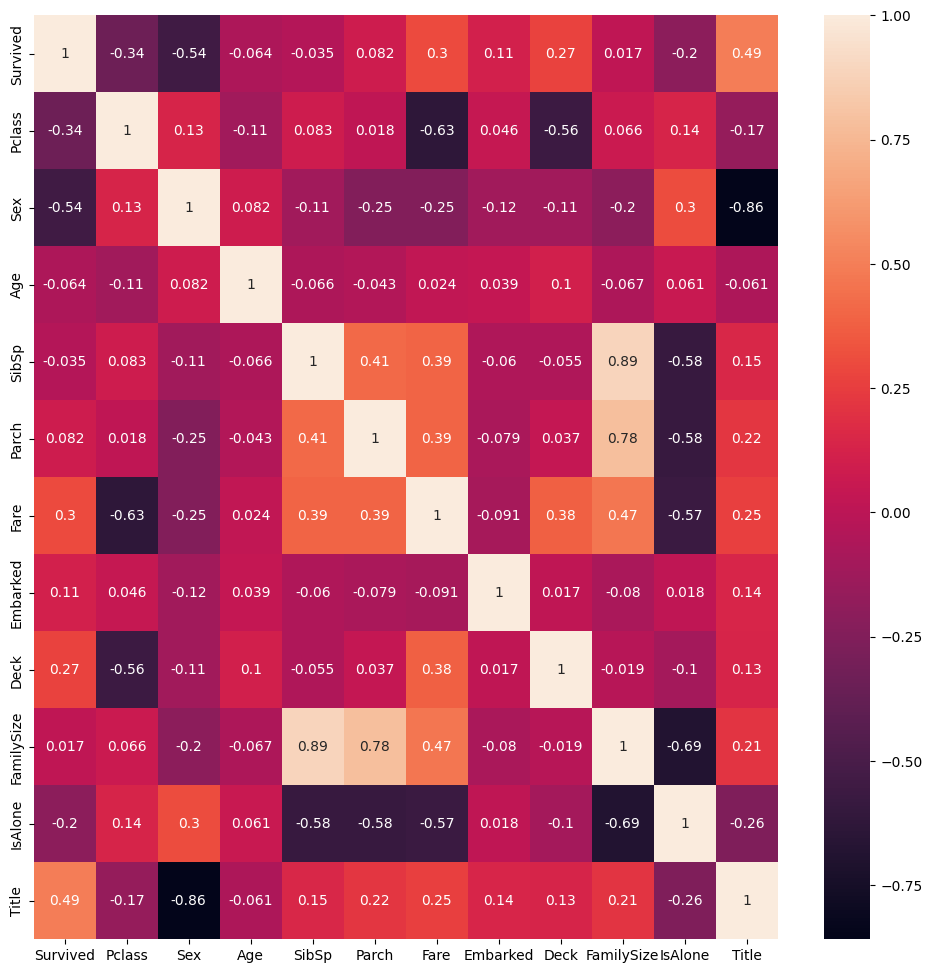

In [17]:
#session start
#Finding correlations to determine the necessary features by heatmap
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [18]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])


Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.793651   126  100
4      0.702703   185  130
5      0.347826    23    8

In [19]:
# Let's use our 'original_train' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train dataset
title_and_sex = original_train.copy()[['Name', 'Sex']]

# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men

Sex           
              mean count  sum
Title                        
Capt      1.000000     1    1
Col       1.000000     2    2
Countess  0.000000     1    0
Don       1.000000     1    1
Dr        0.857143     7    6
Jonkheer  1.000000     1    1
Lady      0.000000     1    0
Major     1.000000     2    2
Master    1.000000    40   40
Miss      0.000000   182    0
Mlle      0.000000     2    0
Mme       0.000000     1    0
Mr        1.000000   517  517
Mrs       0.000000   125    0
Ms        0.000000     1    0
Rev       1.000000     6    6
Sir       1.000000     1    1

In [20]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity


In [21]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node



0.47301295786144265

In [22]:

# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men


0.3064437162277843

In [23]:
# Gini Impurity decrease if node splited for 'female' observations
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women


0.3828350034484158

In [24]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease



-0.13964795747285214

In [25]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1


0.26425329886377663

In [26]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others

0.42170207898424317

In [27]:
df.drop('Title1', axis=1, inplace=True)

In [28]:
dt.drop('Title1', axis=1, inplace=True)

In [29]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease


-0.14267004758907514

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(dt))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] # Extract train data with cv indices
        f_valid = df.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
# Just to show results conveniently
dframe= pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dframe = dframe[["Max Depth", "Average Accuracy"]]
print(dframe.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.818165
         5          0.806966
         6          0.810362
         7          0.824919
         8          0.828340
         9          0.821573
        10          0.823783
        11          0.824894


In [ ]:
#The best max_depth parameter seems therefore to be 3 (82.8% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 3 as the max_depth parameter for our final model.

In [ ]:
df

In [31]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = df['Survived']
x_train = df.drop(['Survived'], axis=1).values 
x_test = dt.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId":sub['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission2.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                               filled= True )
 

In [32]:

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree



82.38

In [33]:
acc_decision_tree = round(decision_tree.score(x_test,sub['Survived']) * 100, 2)

In [34]:
acc_decision_tree

93.78

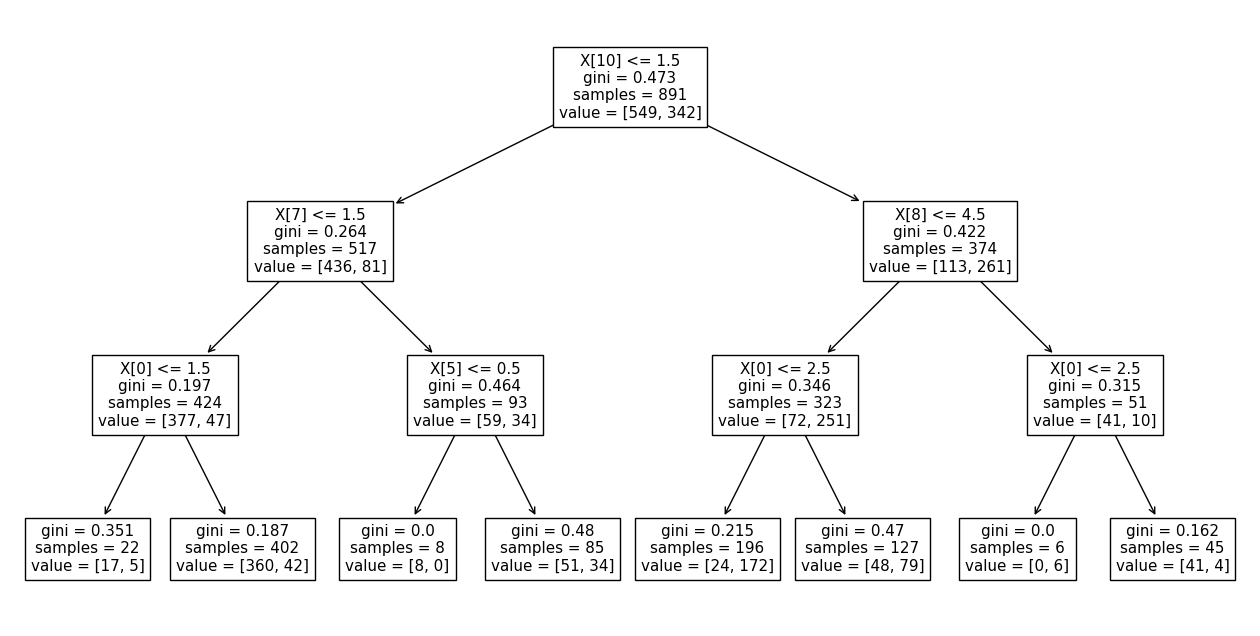

In [35]:
plt.figure(figsize=(16,8))
tree.plot_tree(decision_tree)
plt.show()

In [42]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = df['Survived']
x_train = df.drop(['Survived'], axis=1).values 
x_test = dt.values

# Create Decision Tree with max_depth = 3
decision_treet = tree.DecisionTreeClassifier(max_depth = 4)
decision_treet.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_treet.predict(x_test)
submission = pd.DataFrame({
        "PassengerId":sub['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission2t.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                               filled= True )

In [43]:

acc_decision_tree = round(decision_treet.score(x_train, y_train) * 100, 2)
acc_decision_tree



83.28

In [44]:
acc_decision_treet = round(decision_treet.score(x_test,sub['Survived']) * 100, 2)
acc_decision_treet

94.98

In [49]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = df['Survived']
x_train = df.drop(['Survived'], axis=1).values 
x_test = dt.values

# Create Decision Tree with max_depth = 3
decision_treet5 = tree.DecisionTreeClassifier(max_depth = 5)
decision_treet5.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_treet5.predict(x_test)
submission = pd.DataFrame({
        "PassengerId":sub['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission2t5.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                               filled= True )

In [50]:

acc_decision_treet5 = round(decision_treet5.score(x_train, y_train) * 100, 2)
acc_decision_treet5



84.62

In [51]:
acc_decision_treet5 = round(decision_treet5.score(x_test,sub['Survived']) * 100, 2)
acc_decision_treet5

81.34

In [52]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = df['Survived']
x_train = df.drop(['Survived'], axis=1).values 
x_test = dt.values

# Create Decision Tree with max_depth = 3
decision_treet6 = tree.DecisionTreeClassifier(max_depth = 6)
decision_treet6.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_treet6.predict(x_test)
submission = pd.DataFrame({
        "PassengerId":sub['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission2t5.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                               filled= True )

In [53]:

acc_decision_treet6 = round(decision_treet6.score(x_train, y_train) * 100, 2)
acc_decision_treet6


86.64

In [54]:
acc_decision_treet6 = round(decision_treet6.score(x_test,sub['Survived']) * 100, 2)
acc_decision_treet6

86.36

In [55]:
#Pruning

In [59]:

from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [61]:
y = df['Survived']
x = df.drop(['Survived'], axis=1).values 
#x_test = dt.values
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)
tr=accuracy_score(y_train,y_train_predicted)
te=accuracy_score(y_test,y_test_predicted)
print(tr,te)

0.9131736526946108 0.8251121076233184


In [62]:
#As we see difeerence between accuracy score of train and test is too high means model is overfitted 

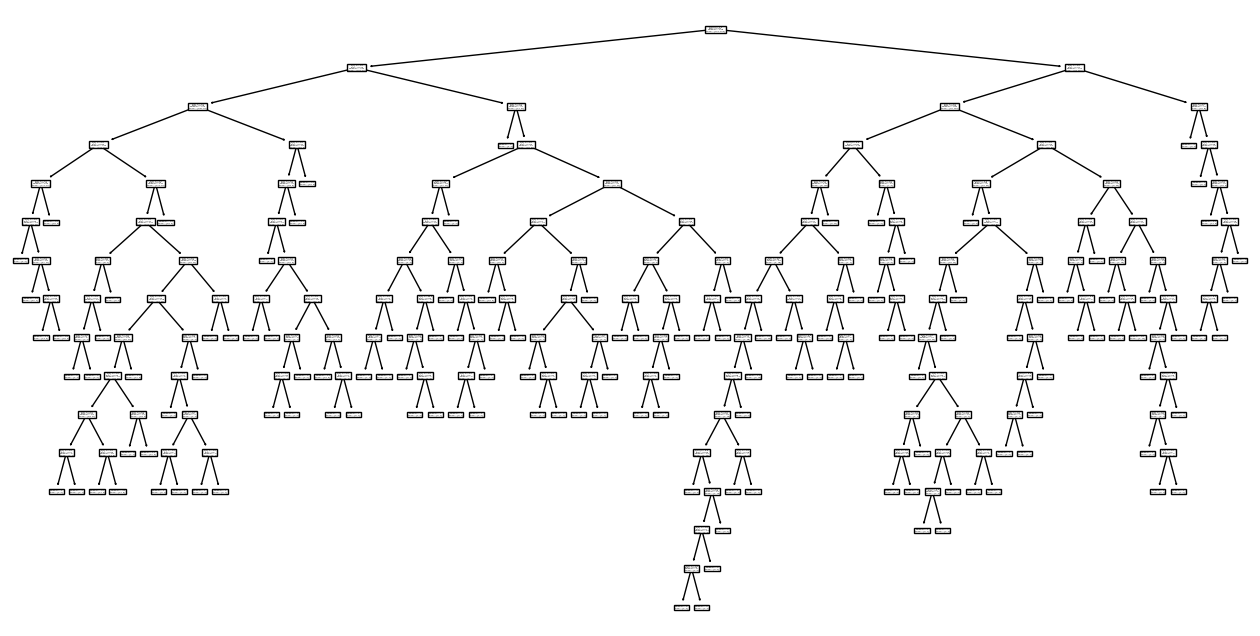

In [63]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

In [64]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.00000000e+00 0.00000000e+00 4.47609764e-06 3.56429997e-05
 4.40295879e-05 6.23752495e-05 7.19677790e-05 9.41569242e-05
 9.98003992e-05 9.98003992e-05 2.13857998e-04 2.36524975e-04
 2.49500998e-04 2.49500998e-04 3.11876248e-04 3.32667997e-04
 3.74251497e-04 3.80760219e-04 4.30922263e-04 4.49101796e-04
 4.99001996e-04 4.99001996e-04 5.02257368e-04 5.32268796e-04
 5.67047723e-04 5.98802395e-04 6.81969395e-04 7.10130893e-04
 7.69888794e-04 7.83544755e-04 8.55431993e-04 8.94179784e-04
 9.07276356e-04 9.14836993e-04 9.98003992e-04 9.98003992e-04
 1.03926762e-03 1.11206159e-03 1.19760479e-03 1.30552848e-03
 1.30988024e-03 1.39720559e-03 1.42894425e-03 1.43047239e-03
 1.43783861e-03 1.45995337e-03 1.66333999e-03 1.68457594e-03
 1.78524938e-03 1.87125749e-03 2.30127979e-03 2.43322878e-03
 2.52323753e-03 2.86808866e-03 3.11876248e-03 4.05098069e-03
 8.46382968e-03 8.51630073e-03 9.04146522e-03 1.02359742e-02
 3.72405853e-02 1.50640773e-01]
*****************

In [65]:
#ccp_alphas gives minimum leaf value of decision tree and each ccp_aphas will create different - different classifier and choose best out of it.ccp_alphas will be added as a parameter in DecisionTreeClassifier() .

In [66]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.15064077291282163


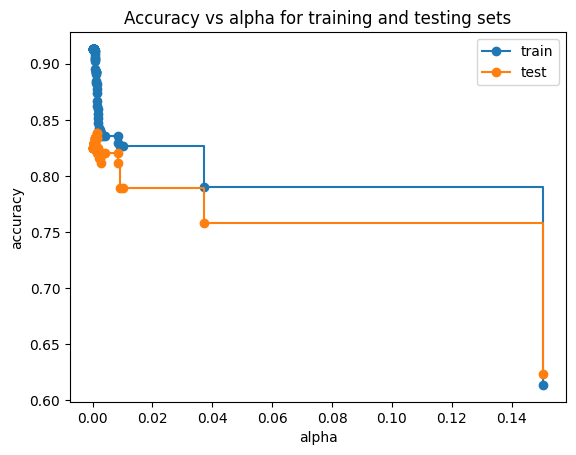

In [67]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [68]:
#If we folow bias and variance tradeoff we will choose that point which will have low bias(low training erro) and low variance(low test error).Here we get that point at a value of alpha=0.02.

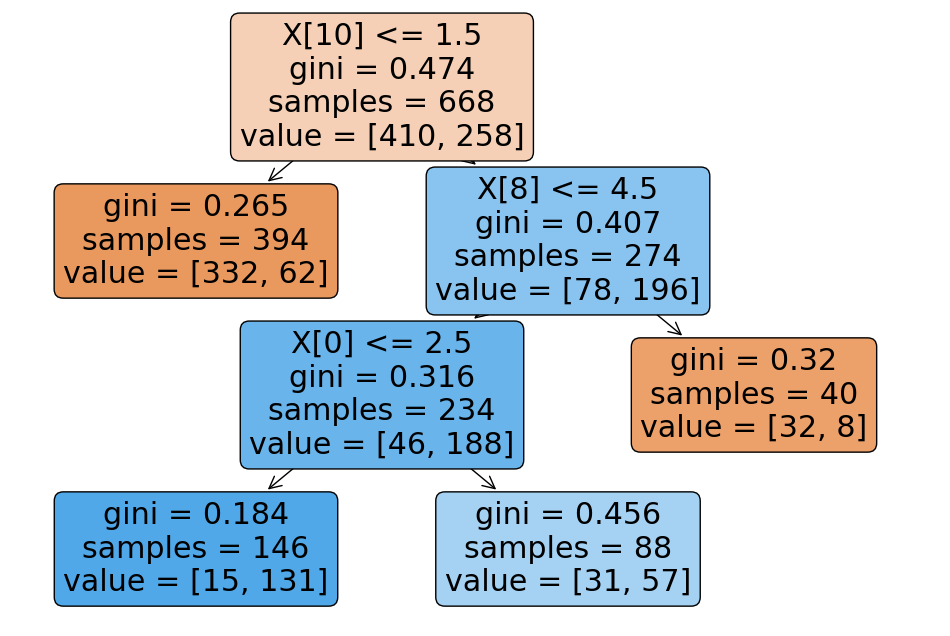

In [77]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [78]:
accuracy_score(y_test,clf.predict(X_test))

0.7892376681614349

In [80]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,Title
0,0,3,1,1,1,0,0,0,1,2,0,1
1,1,1,0,2,1,0,3,1,2,2,0,3
2,1,3,0,1,0,0,1,0,1,1,1,4
3,1,1,0,2,1,0,3,0,2,2,0,3
4,0,3,1,2,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,0,1,1,1,5
887,1,1,0,1,0,0,2,0,7,1,1,4
888,0,3,0,1,1,2,2,0,1,4,0,4
889,1,1,1,1,0,0,2,1,2,1,1,1
